In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
# Define a simple transform to convert images to tensors
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # mean and std for MNIST
])

# Download the training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [11]:
# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

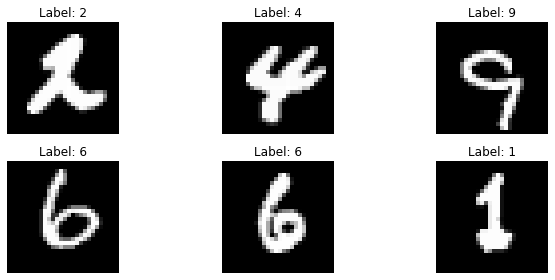

In [12]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

plt.figure(figsize=(10, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title(f"Label: {example_targets[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [13]:
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.flatten = nn.Flatten()               # Flatten 28x28 to 784
        self.fc1 = nn.Linear(28*28, 128)           # First hidden layer
        self.fc2 = nn.Linear(128, 64)              # Second hidden layer
        self.output = nn.Linear(64, 10)            # Output layer for 10 digits

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))                   # Activation 1
        x = F.relu(self.fc2(x))                   # Activation 2
        x = self.output(x)                        # Raw scores (logits)
        return x

In [14]:
model = SimpleMLP()

loss_fn = nn.CrossEntropyLoss()                   # For multi-class classification
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [15]:
def train(model, train_loader, loss_fn, optimizer, epochs=5):
    for epoch in range(epochs):
        total_loss = 0
        model.train()
        for batch in train_loader:
            data, targets = batch

            optimizer.zero_grad()
            outputs = model(data)
            loss = loss_fn(outputs, targets)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

In [16]:
train(model, train_loader, loss_fn, optimizer)

Epoch 1, Loss: 770.1816
Epoch 2, Loss: 290.6124
Epoch 3, Loss: 238.0482
Epoch 4, Loss: 203.6165
Epoch 5, Loss: 177.5318
